# DBACAN Kmeans

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np


In [21]:
df = pd.read_excel('data.xlsx', index_col=None)
df

,天气,温度,湿度,风况,运动
0,晴,85,85,无,不适合
1,晴,80,90,有,不适合
2,多云,83,78,无,适合
3,有雨,70,96,无,适合
4,有雨,68,80,无,适合
5,有雨,65,70,有,不适合
6,多云,64,65,有,适合
7,晴,72,95,无,不适合
8,晴,69,70,无,适合
9,有雨,75,80,无,适合


In [22]:
df['天气'] = df['天气'].replace("晴", 0)
df['天气'] = df['天气'].replace("多云", 1)
df['天气'] = df['天气'].replace("有雨", 2)
df['风况'] = df['风况'].replace("无", 0)
df['风况'] = df['风况'].replace("有", 1)
df['运动'] = df['运动'].replace("不适合", 0)
df['运动'] = df['运动'].replace("适合", 1)


In [23]:
df['温度'] = np.where(df['温度'] < 70, 0, df['温度'])
df['温度'] = np.where((df['温度'] < 80) & (df['温度'] >= 70), 1, df['温度'])
df['温度'] = np.where(df['温度'] >= 80, 2, df['温度'])
df['湿度'] = np.where(df['湿度'] > 80, 1, 0)


In [24]:
df


,天气,温度,湿度,风况,运动
0,0,2,1,0,0
1,0,2,1,1,0
2,1,2,0,0,1
3,2,1,1,0,1
4,2,0,0,0,1
5,2,0,0,1,0
6,1,0,0,1,1
7,0,1,1,0,0
8,0,0,0,0,1
9,2,1,0,0,1


In [25]:
data = df[['天气', '温度', '湿度', '风况']]
target = df['运动']
data = np.array(data)
target = np.array(target)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)


In [26]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print(score)

0.6


(150, 4)


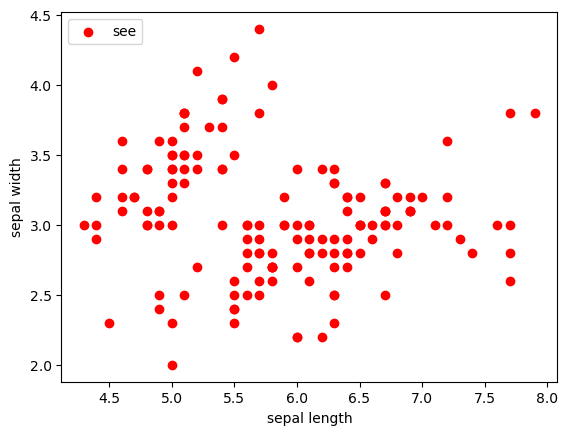

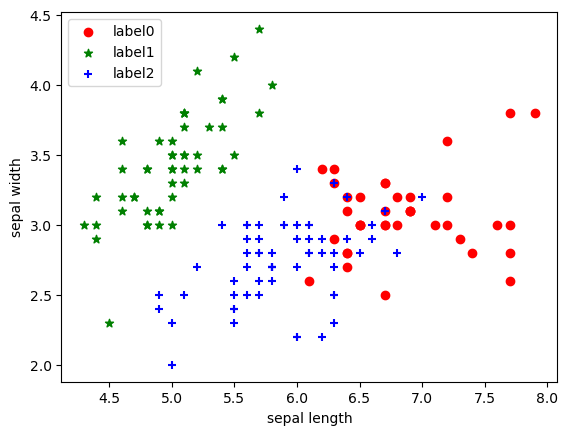

In [3]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # #表示我们取特征空间中的4个维度
print(X.shape)
 
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  
 
estimator = KMeans(n_clusters=3)  # 构造聚类器
estimator.fit(X)  # 聚类
label_pred = estimator.labels_  # 获取聚类标签
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  

(150, 4)


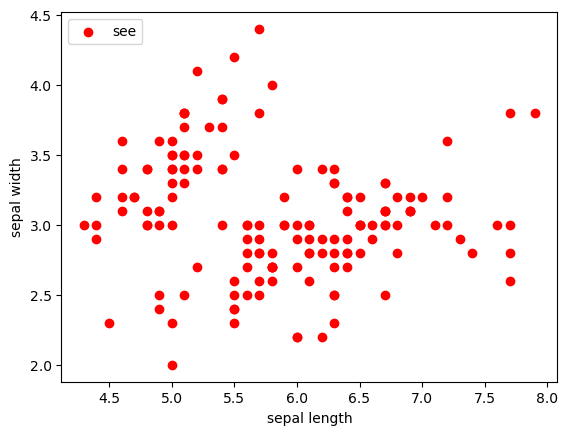

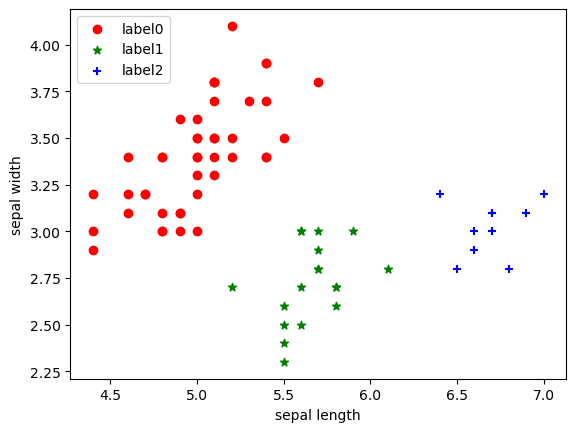

In [2]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
from  sklearn.cluster import DBSCAN
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # #表示我们只取特征空间中的4个维度
print(X.shape)
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  
 
dbscan = DBSCAN(eps=0.4, min_samples=9)
dbscan.fit(X) 
label_pred = dbscan.labels_
 
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  

# apriori算法

In [1]:
def item(dataset):      #求第一次扫描数据库后的 候选集，（它没法加入循环）
    c1 = []     #存放候选集元素

    for x in dataset:       #就是求这个数据库中出现了几个元素，然后返回
        for y in x:
            if [y] not in c1:
                c1.append( [y] )
    c1.sort()
    #print(c1)
    return c1

def get_frequent_item(dataset, c, min_support):
    cut_branch = {}     #用来存放所有项集的支持度的字典
    for x in c:
        for y in dataset:
            if set(x).issubset(set(y)):     #如果 x 不在 y中，就把对应元素后面加 1
                cut_branch[tuple(x)] = cut_branch.get(tuple(x), 0) + 1     #cut_branch[y] = new_cand.get(y, 0)表示如果字典里面没有想要的关键词，就返回0
    #print(cut_branch)

    Fk = []       #支持度大于最小支持度的项集，  即频繁项集
    sup_dataK = {}  #用来存放所有 频繁 项集的支持度的字典

    for i in cut_branch:
        if cut_branch[i] >= min_support:    #Apriori定律1  小于支持度，则就将它舍去，它的超集必然不是频繁项集
            Fk.append( list(i))
            sup_dataK[i] = cut_branch[i]
    #print(Fk)
    return Fk, sup_dataK

def get_candidate(Fk, K):       #求第k次候选集
    ck = []    #存放产生候选集

    for i in range(len(Fk)):
        for j in range(i+1, len(Fk)):
            L1 = list(Fk[i])[:K-2]
            L2 = list(Fk[j])[:K-2]
            L1.sort()
            L2.sort() #先排序，在进行组合

            if L1 == L2:
                if K > 2:       #第二次求候选集，不需要进行减枝，因为第一次候选集都是单元素，且已经减枝了，组合为双元素肯定不会出现不满足支持度的元素
                    new = list(set(Fk[i]) ^ set(Fk[j]) ) #集合运算 对称差集 ^ （含义，集合的元素在t或s中，但不会同时出现在二者中）
                    #new表示，这两个记录中，不同的元素集合
                    # 为什么要用new？ 比如 1，2     1，3  两个合并成 1，2，3   我们知道1，2 和 1，3 一定是频繁项集，但 2，3呢，我们要判断2，3是否为频繁项集
                    #Apriori定律1 如果一个集合不是频繁项集，则它的所有超集都不是频繁项集
                else:
                    new = set()
                for x in Fk:
                    if set(new).issubset(set(x)) and list(set(Fk[i]) | set(Fk[j])) not in ck:  #减枝 new是 x 的子集，并且 还没有加入 ck 中
                        ck.append( list(set(Fk[i]) | set(Fk[j])) )
    #print(ck)
    return ck

def Apriori(dataset, min_support = 2):
    c1 = item (dataset) #返回一个二维列表，里面的每一个一维列表，都是第一次候选集的元素
    f1, sup_1 = get_frequent_item(dataset, c1, min_support)       #求第一次候选集

    F = [f1]      #将第一次候选集产生的频繁项集放入 F ,以后每次扫描产生的所有频繁项集都放入里面
    sup_data = sup_1       #一个字典，里面存放所有产生的候选集，及其支持度

    K = 2 #从第二个开始循环求解，先求候选集，在求频繁项集

    while (len(F[K-2]) > 1):  #k-2是因为F是从0开始数的     #前一个的频繁项集个数在2个或2个以上，才继续循环，否则退出
        ck = get_candidate(F[K-2], K)  #求第k次候选集
        fk, sup_k = get_frequent_item(dataset, ck, min_support)     #求第k次频繁项集

        F.append(fk)    #把新产生的候选集假如F
        sup_data.update(sup_k)  #字典更新，加入新得出的数据
        K+=1
    return F, sup_data    #返回所有频繁项集， 以及存放频繁项集支持度的字典


In [2]:
dataset = [["面包", "牛奶", "啤酒"],
           ["啤酒", "泡面", "尿布"],
           ["矿泉水", "泡面", "尿布"],
           ["啤酒", "尿布"],
           ["面包", "牛奶", "啤酒", "尿布"],
           ["面包",  "牛奶", "啤酒"],
           ["啤酒", "牛奶", "尿布"]]       #装入数据 二维列表
F, sup_data = Apriori(dataset, min_support = 2)   #最小支持度设置为2

print("具有关联的商品是{}".format(F))   #带变量的字符串输出,必须为字典符号表示
print('------------------')
print("对应的支持度为{}".format(sup_data))
    


具有关联的商品是[[['啤酒'], ['尿布'], ['泡面'], ['牛奶'], ['面包']], [['尿布', '啤酒'], ['牛奶', '啤酒'], ['面包', '啤酒'], ['泡面', '尿布'], ['牛奶', '尿布'], ['面包', '牛奶']], [['牛奶', '尿布', '啤酒'], ['面包', '牛奶', '啤酒']], []]
------------------
对应的支持度为{('啤酒',): 6, ('尿布',): 5, ('泡面',): 2, ('牛奶',): 4, ('面包',): 3, ('尿布', '啤酒'): 4, ('牛奶', '啤酒'): 4, ('面包', '啤酒'): 3, ('泡面', '尿布'): 2, ('牛奶', '尿布'): 2, ('面包', '牛奶'): 3, ('牛奶', '尿布', '啤酒'): 2, ('面包', '牛奶', '啤酒'): 3}


# 协同过滤算法

In [5]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

moviesPath = "C:\\Users\\31064\ml-latest-small\\movies.csv"
ratingsPath = "C:\\Users\\31064\\ml-latest-small\\ratings.csv"
moviesDF = pd.read_csv(moviesPath, index_col=None)
ratingsDF = pd.read_csv(ratingsPath, index_col=None)



In [7]:
trainRatingsDF, testRatingsDF = train_test_split(ratingsDF, test_size=0.2)
print("total_movie_count:" + str(len(set(ratingsDF['movieId'].values.tolist()))))
print("total_user_count:" + str(len(set(ratingsDF['userId'].values.tolist()))))
print("train_movie_count:" + str(len(set(trainRatingsDF['movieId'].values.tolist()))))
print("test_movie_count:" + str(len(set(testRatingsDF['movieId'].values.tolist()))))
print("train_user_count:" + str(len(set(trainRatingsDF['userId'].values.tolist()))))
print("test_user_count:" + str(len(set(testRatingsDF['userId'].values.tolist()))))


total_movie_count:9724
total_user_count:610
train_movie_count:9011
test_movie_count:5116
train_user_count:610
test_user_count:610


In [8]:
trainRatingsPivotDF = pd.pivot_table(trainRatingsDF[['userId', 'movieId', 'rating']], columns=['movieId'],index=['userId'], values='rating', fill_value=0)

In [9]:
def calCosineSimilarity(list1, list2):
    res = 0
    denominator1 = 0
    denominator2 = 0
    for (val1, val2) in zip(list1, list2):
        res += (val1 * val2)
        denominator1 += val1 ** 2
        denominator2 += val2 ** 2
    return res / (math.sqrt(denominator1 * denominator2))


In [12]:
ratingValues = trainRatingsPivotDF.values.tolist()

In [13]:
userSimMatrix = np.zeros((len(ratingValues), len(ratingValues)), dtype=np.float32)
for i in range(len(ratingValues) - 1):
    for j in range(i + 1, len(ratingValues)):
        userSimMatrix[i, j] = calCosineSimilarity(ratingValues[i], ratingValues[j])
        userSimMatrix[j, i] = userSimMatrix[i, j]

In [14]:
userMostSimDict = dict()
for i in range(len(ratingValues)):
    userMostSimDict[i] = sorted(enumerate(list(userSimMatrix[i])), key=lambda x: x[1], reverse=True)[:10]


In [15]:
userRecommendValues = np.zeros((len(ratingValues), len(ratingValues[0])), dtype=np.float32)  # 610*8981

for i in range(len(ratingValues)):
    for j in range(len(ratingValues[i])):
        if ratingValues[i][j] == 0:
            val = 0
            for (user, sim) in userMostSimDict[i]:
                val += (ratingValues[user][j] * sim)
            userRecommendValues[i, j] = val


In [16]:
userRecommendDict = dict()
for i in range(len(ratingValues)):
    userRecommendDict[i] = sorted(enumerate(list(userRecommendValues[i])), key=lambda x: x[1], reverse=True)[:10]


In [18]:
moviesMap = dict(enumerate(list(trainRatingsPivotDF.columns)))
usersMap = dict(enumerate(list(trainRatingsPivotDF.index)))

userRecommendList = []
for key, value in userRecommendDict.items():
    user = usersMap[key]
    for (movieId, val) in value:
        userRecommendList.append([user, moviesMap[movieId]])


In [19]:
recommendDF = pd.DataFrame(userRecommendList, columns=['userId', 'movieId'])
recommendDF = pd.merge(recommendDF, moviesDF[['movieId', 'title']], on='movieId', how='inner')
print(recommendDF.tail(10))


      userId  movieId                                     title
6090     576     2109                          Jerk, The (1979)
6091     578    80549                             Easy A (2010)
6092     578    49286                       Holiday, The (2006)
6093     580     8360                            Shrek 2 (2004)
6094     599     8360                            Shrek 2 (2004)
6095     584      553                          Tombstone (1993)
6096     603     1204                 Lawrence of Arabia (1962)
6097     606     1408          Last of the Mohicans, The (1992)
6098     608     1408          Last of the Mohicans, The (1992)
6099     610     2542  Lock, Stock & Two Smoking Barrels (1998)


In [10]:
import math
import random
import pandas as pd
from collections import defaultdict
from operator import itemgetter
 
def LoadMovieLensData(filepath, train_rate):
    ratings = pd.read_table(filepath, sep="::", header=None, names=["UserID", "MovieID", "Rating", "TimeStamp"],\
                            engine='python')
    ratings = ratings[['UserID','MovieID']]
 
    train = []
    test = []
    random.seed(3)   #随机数生成器的种子为3
    '''
    用于将 ratings DataFrame 中的每一行作为一个元组进行迭代。
    然后在每次迭代中，我们从当前行中取出 UserID 和 MovieID，并以一定的概率将其添加到 train 或 test 列表中。
    最后，我们将 train 和 test 列表作为参数传递给 PreProcessData() 函数，
    返回经过预处理的训练数据和测试数据。
    '''
    for idx, row in ratings.iterrows():
        user = int(row['UserID'])
        item = int(row['MovieID'])
        if random.random() < train_rate:
            train.append([user, item])
        else:
            test.append([user, item])
    return PreProcessData(train), PreProcessData(test)
 
def PreProcessData(originData):
    """
    建立User-Item表，结构如下：
        {"User1": {MovieID1, MoveID2, MoveID3,...}
         "User2": {MovieID12, MoveID5, MoveID8,...}
         ...
        }
    在这个数据结构中，用户 user 是字典的 key，其 value 是一个集合，表示该用户评分过的电影集合。
    因此，如果该用户之前出现过，则直接将电影添加到该用户的集合中；
    如果该用户是第一次出现，则先将其加入到字典中，并将其电影集合初始化为空集合。
    """
    trainData = dict()
    for user, item in originData:
        trainData.setdefault(user, set())
        trainData[user].add(item)
    return trainData
 
 
class ItemCF(object):
    ''' 初始化 '''
    def __init__(self, trainData, similarity="cosine", norm=True):
        self._trainData = trainData
        self._similarity = similarity
        self._isNorm = norm
        self._itemSimMatrix = dict() # 物品相似度矩阵
 
    def similarity(self):
        N = defaultdict(int) #记录每个物品的喜爱人数
        for user, items in self._trainData.items():
            for i in items:
                self._itemSimMatrix.setdefault(i, dict())
                N[i] += 1
                for j in items:
                    if i == j:
                        continue
                    self._itemSimMatrix[i].setdefault(j, 0)
                    if self._similarity == "cosine":
                        self._itemSimMatrix[i][j] += 1     #计算两个物品之间的共现次数的
                    elif self._similarity == "iuf":        
                        self._itemSimMatrix[i][j] += 1. / math.log1p(len(items) * 1.)
        for i, related_items in self._itemSimMatrix.items():
            for j, cij in related_items.items():
                self._itemSimMatrix[i][j] = cij / math.sqrt(N[i]*N[j])
        # 是否要标准化物品相似度矩阵
        if self._isNorm:
            for i, relations in self._itemSimMatrix.items():
                max_num = relations[max(relations, key=relations.get)]
                # 对字典进行归一化操作之后返回新的字典
                self._itemSimMatrix[i] = {k : v/max_num for k, v in relations.items()}
 
    def recommend(self, user, N, K):
        """
        :param user: 被推荐的用户user
        :param N: 推荐的商品个数
        :param K: 查找的最相似的用户个数
        :return: 按照user对推荐物品的感兴趣程度排序的N个商品
        """
        recommends = dict()
        # 先获取user的喜爱物品列表
        items = self._trainData[user]
        '''
        遍历用户已经喜欢的物品列表 items对于每一个物品 item，
        在物品相似度矩阵 _itemSimMatrix 中找到与其最相似的K个物品，
        即遍历该物品在 _itemSimMatrix 中的行，得到 (j, sim) 的键值对，
        其中 j 表示另一个物品，sim 表示两个物品之间的相似度。
        将 (j, sim) 的键值对按照相似度进行排序，选择相似度最高的前K个物品。
        将选出来的K个物品放入推荐字典 recommends 中，若该物品在 items 中出现过，则跳过不计。返回排序后的推荐字典。
        '''
        for item in items:
            # 对每个用户喜爱物品在物品相似矩阵中找到与其最相似的K个
            for i, sim in sorted(self._itemSimMatrix[item].items(), key=itemgetter(1), reverse=True)[:K]:
                if i in items:
                    continue  # 如果与user喜爱的物品重复了，则直接跳过
                recommends.setdefault(i, 0.)
                recommends[i] += sim
        # 根据被推荐物品的相似度逆序排列，然后推荐前N个物品给到用户
        return dict(sorted(recommends.items(), key=itemgetter(1), reverse=True)[:N])
 
    def train(self):
        self.similarity()
 
if __name__ == "__main__":
    train, test = LoadMovieLensData("C:\\Users\\31064\\ml-1m\\ratings.dat", 0.8)
 
    print("train data size: %d, test data size: %d" % (len(train), len(test)))
    ItemCF = ItemCF(train, similarity='iuf', norm=True)
    ItemCF.train()
 
    # 分别对以下4个用户进行物品推荐
    print(ItemCF.recommend(1, 5, 80))
    print(ItemCF.recommend(2, 5, 80))
    print(ItemCF.recommend(3, 5, 80))
    print(ItemCF.recommend(4, 5, 80))

train data size: 6040, test data size: 6030
{1196: 23.965756454677646, 1097: 23.182727104691942, 1198: 22.94448230324663, 1: 22.036373892558373, 1265: 20.785969662808093}
{1580: 49.09537130022913, 377: 42.20039910397584, 608: 41.58398854994261, 2916: 40.4354238235108, 296: 39.01577825731824}
{1036: 20.575069918297654, 592: 19.545923446539252, 1210: 18.631538385064193, 2174: 18.288138210241225, 1240: 17.97079899608672}
{589: 14.280943815751622, 2571: 14.18409548185235, 1200: 14.024903571665726, 858: 13.68667814399541, 1387: 13.252895283195155}
